<a href="https://colab.research.google.com/github/amirhoseinRj/Digikala-Data-Cup/blob/master/digi_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastai --upgrade

     |████████████████████████████████| 358kB 4.4MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.text.all import *

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'digi_sale/'

Mounted at /content/gdrive


In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/digikala sales prediction/nlp/train_users.csv')
train_df.head(5)

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate
0,0,NaN,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,NaN,NaN,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300 میلی لیتر,ضدعفونی کننده,1,1,100.0
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهمه این گوشی عالیه و بیخودی پول برند نمیدی.,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و زیبایی\r"",""باتری 5000 و فست شارژ\r"",""صدای با حجم بالا و کیفیت مناسب\r"",""حافظه داخلی 64\r"",""دوربین ""]","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو سیم‌ کارت ظرفیت 64 گیگابایت,گوشی موبایل,1,1,80.0
2,2,عالی,خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خوشحال شد لطفا در بسته بندی بیشتر توجه بشه,NaN,NaN,ماسک کودک طرح سگ نگهبان مدل رابل,ایفای نقش,1,1,100.0
3,3,NaN,در کل خوب بود ولی متاسفانه درب محصول شکسته بود و مقداریش داخل بسته بندی خالی شده بود.,NaN,NaN,مایع ضدعفونی کننده میوه و سبزیجات من مدل WT حجم 500 میلی لیتر,ضدعفونی کننده سطوح,1,1,70.0
4,4,NaN,من که خیلی باهاش حال کردم فقط من که همیشه L میپوشیدم اینبار M گرفتم چون لانگه و اندازه ش بزرگتره,NaN,NaN,تی شرت آستین کوتاه مردانه باینت کد 323-1 btt,تی شرت و پولوشرت مردانه,1,1,72.0


In [ ]:
test_df = pd.read_csv('/content/gdrive/My Drive/digikala sales prediction/nlp/test_users.csv')
test_df.head(5)

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer
0,0,با کیفیت,بسته بندی بهداشتی و کیفیت عالی,NaN,NaN,گوش پاک کن کتابی پنبه ریز بسته 200 عددی,گوش پاک کن,1
1,1,گوشی موبایل شیائومی,این گوشی فوق‌العاده است,"[""این گوشی همه چیش فوق‌العاده است از دوربین تا نرم‌افزار هایی که داره واقعا عالیه ""]","[""اصلا هیچ نقاط ضعفی نداره ""]",گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG دو سیم‌ کارت ظرفیت 128 گیگابایت - طرح قیمت شگفت انگیز,گوشی موبایل,1
2,2,NaN,صداش قطع میشه باتریشم خیییلی ضعیفه,NaN,NaN,هدفون بی سیم مدل inpods 12,هدفون، هدست و هندزفری,1
3,3,NaN,بنظرم‌ خوبه,NaN,NaN,خمیر دندان نسیم مدل Feluoride Protection مقدار 80 گرم,خمیر دندان,1
4,4,عااالیه,عااالیه,"[""عاااالیه""]",NaN,کرم موبر صورت و بدن سینره حجم 100 میلی لیتر,کرم موبر,1


In [ ]:
dls = TextDataLoaders.from_df(train_df, path='.', text_col=['title','comment', 'advantages' ,'disadvantages'],label_col = 'verification_status' , valid_pct=0.2, bs = 128)

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5 ,metrics=accuracy)

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.0831763744354248)

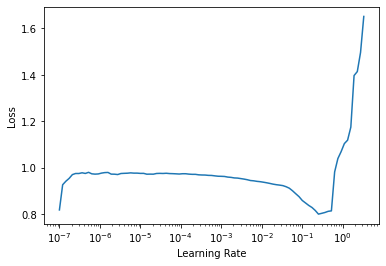

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.383154,0.162582,0.962291,05:40


epoch,train_loss,valid_loss,accuracy,time
0,0.140476,0.169549,0.962613,06:52
1,0.099853,0.082435,0.977023,06:55
2,0.062564,0.323584,0.978025,06:56
3,0.064286,6.003785,0.972087,06:53


In [ ]:
nlp_predictions = pd.DataFrame(columns= ['id','verification_status'])

In [ ]:
test_df = test_df.fillna(' ')
test_df

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer
0,0,با کیفیت,بسته بندی بهداشتی و کیفیت عالی,,,گوش پاک کن کتابی پنبه ریز بسته 200 عددی,گوش پاک کن,1
1,1,گوشی موبایل شیائومی,این گوشی فوق‌العاده است,"[""این گوشی همه چیش فوق‌العاده است از دوربین تا نرم‌افزار هایی که داره واقعا عالیه ""]","[""اصلا هیچ نقاط ضعفی نداره ""]",گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG دو سیم‌ کارت ظرفیت 128 گیگابایت - طرح قیمت شگفت انگیز,گوشی موبایل,1
2,2,,صداش قطع میشه باتریشم خیییلی ضعیفه,,,هدفون بی سیم مدل inpods 12,هدفون، هدست و هندزفری,1
3,3,,بنظرم‌ خوبه,,,خمیر دندان نسیم مدل Feluoride Protection مقدار 80 گرم,خمیر دندان,1
4,4,عااالیه,عااالیه,"[""عاااالیه""]",,کرم موبر صورت و بدن سینره حجم 100 میلی لیتر,کرم موبر,1
...,...,...,...,...,...,...,...,...
19394,19394,,خوشمزه مثل همیشه,,,چاشنی خورش قرمه سبزی هاتی کارا مقدار 750 گرم,ادویه و چاشنی,1
19395,19395,عالی,عالی\r\nبوش مثله خود ادکلنشه,,,اسپری خوشبو کننده بدن زنانه پرستیژ مدل Tresor Midnight Rose حجم 150 میلی لیتر,اسپری,1
19396,19396,,نازکه. نسبت به کیفیتش قیمتش بالاست تازه من داخل شگفت انگیز خریدم,,,دستکش زنانه دالیا مدل viscose2,دستکش زنانه,1
19397,19397,چای ایرانی,چای ایرانی بنوش هموطن,,,چای شکسته ایرانی مهمان دوست مقدار 500 گرم,چای,1


In [ ]:
test_df.iloc[0]['comment'] + ' ' + test_df.iloc[0]['title'] + ' ' + test_df.iloc[0]['advantages'] + ' ' + test_df.iloc[1]['disadvantages']

'بسته بندی بهداشتی و کیفیت عالی با کیفیت   ["اصلا هیچ نقاط ضعفی نداره "]'

In [ ]:
for i in range(len(test_df)):
  verified,_,_ = learn.predict(test_df.iloc[i]['comment'] + ' ' + test_df.iloc[i]['title'] + ' ' + test_df.iloc[i]['advantages'] + ' ' + test_df.iloc[i]['disadvantages'] )
  nlp_predictions = nlp_predictions.append({'id': i, 'verification_status': verified }, ignore_index=True)

In [ ]:
nlp_predictions

,id,verification_status
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
19394,19394,1
19395,19395,1
19396,19396,1
19397,19397,1


In [ ]:
nlp_predictions.to_csv('/content/gdrive/My Drive/digikala sales prediction/nlp/nlp_preds.csv' , index = False)